In [1155]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [1156]:
ts_df = pd.read_csv('hourtradestats-2020-2023.csv', sep=';')
os_df = pd.read_csv('hourorderstats-2020-2023.csv', sep = ';')

In [1157]:
ts_df = ts_df.drop(columns='SYSTIME')
os_df = os_df.drop(columns='SYSTIME')

In [1158]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85328 entries, 0 to 85327
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tradedate  85328 non-null  object 
 1   tradetime  85328 non-null  object 
 2   secid      85328 non-null  object 
 3   pr_open    85328 non-null  float64
 4   pr_high    85328 non-null  float64
 5   pr_low     85328 non-null  float64
 6   pr_close   85328 non-null  float64
 7   pr_std     85317 non-null  float64
 8   vol        85328 non-null  float64
 9   val        85328 non-null  float64
 10  trades     85328 non-null  float64
 11  pr_vwap    85328 non-null  float64
 12  pr_change  85328 non-null  float64
 13  trades_b   85328 non-null  float64
 14  trades_s   85328 non-null  float64
 15  val_b      85328 non-null  float64
 16  val_s      85328 non-null  float64
 17  vol_b      85328 non-null  float64
 18  vol_s      85328 non-null  float64
 19  disb       85328 non-null  float64
 20  pr_vwa

In [1159]:
print(ts_df.shape)
print(os_df.shape)

(85328, 22)
(85328, 25)


In [1160]:
all_df = pd.concat([ts_df, os_df.select_dtypes(include=['float64'])], axis=1)

In [1161]:
tickers_list = ['SBER', 'ROSN', 'NVTK', 'GMKN', 'YNDX', 'LKOH', 'PLZL', 'MOEX', 'PHOR', 'GAZP']
# Критическое значение (в примере 0.5% от цены закрытия)
critical_value = 0.005

# Минимальное значение роста цены (в примере 1%)
min_price_increase = 0.01

# Создание нового столбца для целевой переменной
all_df['target'] = 0  # Изначально устанавливаем значение 0

# Идем по каждой ценной бумаге в списке
for ticker in tickers_list:
    # Выбираем данные только для текущей ценной бумаги
    ticker_data = all_df[all_df['secid'] == ticker].copy()

    # Вычисляем условия для целевой переменной
    condition = (ticker_data['pr_low'].shift(-1) >= (1 - critical_value) * ticker_data['pr_close']) & \
                (ticker_data['pr_close'].shift(-1) >= (1 + min_price_increase) * ticker_data['pr_close'])

    # Устанавливаем значение целевой переменной равное 1 для соответствующих строк в предыдущей строке
    all_df.loc[condition.index, 'target'] = condition.astype(int)

In [1162]:
# Преобразовываем столбец tradedate в формат datetime
all_df['tradedate'] = pd.to_datetime(all_df['tradedate'])

# Список тикеров
tickers = ['SBER', 'ROSN', 'NVTK', 'GMKN', 'YNDX', 'LKOH', 'PLZL', 'MOEX', 'PHOR', 'GAZP']

# Создаем DataFrame для сохранения данных
all_df_updated = pd.DataFrame()

for ticker in tickers:
    # Выбираем данные для текущего тикера
    df_ticker = all_df[all_df['secid'] == ticker]

    df_ticker = df_ticker[(
        ((df_ticker['tradedate'].dt.month == 9) & (df_ticker['tradedate'].dt.day <= 15)) |
        ((df_ticker['tradedate'].dt.month == 11) & (df_ticker['tradedate'].dt.day <= 15)) |
        ((df_ticker['tradedate'].dt.month == 3) & (df_ticker['tradedate'].dt.day <= 15)) |
        ((df_ticker['tradedate'].dt.month == 1) & (df_ticker['tradedate'].dt.day <= 15))
    )]

    # Сохраняем в CSV
    filename = f'Test_data/{ticker}_test.csv'
    df_ticker.to_csv(filename, index=False)

    print(f'DataFrame for {ticker} (excluding the first halves of September, November, March, and January) saved to {filename}')

    # Добавляем обновленные данные в общий DataFrame
    all_df_updated = pd.concat([all_df_updated, df_ticker], ignore_index=True)

# Сохраняем измененный исходный датафрейм в CSV
all_df_updated.to_csv('Test_data/all_df_updated.csv', index=False)

DataFrame for SBER (excluding the first halves of September, November, March, and January) saved to Test_data/SBER_test.csv
DataFrame for ROSN (excluding the first halves of September, November, March, and January) saved to Test_data/ROSN_test.csv
DataFrame for NVTK (excluding the first halves of September, November, March, and January) saved to Test_data/NVTK_test.csv
DataFrame for GMKN (excluding the first halves of September, November, March, and January) saved to Test_data/GMKN_test.csv
DataFrame for YNDX (excluding the first halves of September, November, March, and January) saved to Test_data/YNDX_test.csv
DataFrame for LKOH (excluding the first halves of September, November, March, and January) saved to Test_data/LKOH_test.csv
DataFrame for PLZL (excluding the first halves of September, November, March, and January) saved to Test_data/PLZL_test.csv
DataFrame for MOEX (excluding the first halves of September, November, March, and January) saved to Test_data/MOEX_test.csv
DataFram

In [1163]:
test_df = pd.read_csv('Test_data/all_df_updated.csv')
test_df.shape

(12330, 45)

In [1164]:
len(test_df['tradedate'].value_counts())

137

In [1165]:
all_df.shape

(85328, 45)

In [1166]:
all_df = all_df[~all_df.index.isin(test_df.index)]
all_df.shape

(72998, 45)

In [1167]:
all_df = all_df.drop(columns=['tradedate', 'tradetime', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b', 'pr_std', 'pr_vwap_b'])

In [1168]:
sber = all_df[all_df['secid'] == 'SBER']
rosn = all_df[all_df['secid'] == 'ROSN']
nvtk = all_df[all_df['secid'] == 'NVTK']
gmkn = all_df[all_df['secid'] == 'GMKN']
yndx = all_df[all_df['secid'] == 'YNDX']
lkoh = all_df[all_df['secid'] == 'LKOH']
plzl = all_df[all_df['secid'] == 'PLZL']
moex = all_df[all_df['secid'] == 'MOEX']
phor = all_df[all_df['secid'] == 'PHOR']
gazp = all_df[all_df['secid'] == 'GAZP']

In [1169]:
all_df = all_df.drop(columns=['secid'])

In [1170]:
tg_cl = all_df['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)

3.702125241504717


In [1171]:
# sber['datetime'] = pd.to_datetime(sber['tradedate'] + ' ' + sber['tradetime'])
# # Установка столбца datetime в качестве индекса
# sber.set_index('datetime', inplace=True)

# # Рассчет скользящей средней с окном в 8 часов
# window_size = '8H'
# sber['pr_close_ma'] = sber.groupby('secid')['pr_close'].rolling(window=window_size).mean().reset_index(level=0, drop=True)

# # Вывод результата
# print(sber[['tradedate', 'tradetime', 'secid', 'pr_close', 'pr_close_ma']])

In [1172]:
# sber = sber.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# rosn = rosn.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# nvtk = nvtk.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# gmkn = gmkn.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# yndx = yndx.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# lkoh = lkoh.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# plzl = plzl.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# moex = moex.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# phor = phor.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])
# gazp = gazp.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])

In [1173]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Создание синтетических данных с помощью SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(all_df.drop('target', axis=1), all_df['target'])

# # Создание нового DataFrame на основе сгенерированных данных
# all_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=all_df.drop('target', axis=1).columns),
#                               pd.DataFrame(y_resampled, columns=['target'])],
#                              axis=1)

# # Вывод информации о количестве классов в новых данных
# print(all_df_resampled['target'].value_counts())

In [1174]:
sber = sber.drop(columns=['secid'])
rosn = rosn.drop(columns=['secid'])
nvtk = nvtk.drop(columns=['secid'])
gmkn = gmkn.drop(columns=['secid'])
yndx = yndx.drop(columns=['secid'])
lkoh = lkoh.drop(columns=['secid'])
plzl = plzl.drop(columns=['secid'])
moex = moex.drop(columns=['secid'])
phor = phor.drop(columns=['secid'])
gazp = gazp.drop(columns=['secid'])

In [1175]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(sber.drop('target', axis=1), sber['target'])

# Создание нового DataFrame на основе сгенерированных данных
sber = pd.concat([pd.DataFrame(X_resampled, columns=sber.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(sber['target'].value_counts())

target
0    7055
1    7055
Name: count, dtype: int64


In [1176]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(rosn.drop('target', axis=1), rosn['target'])

# Создание нового DataFrame на основе сгенерированных данных
rosn = pd.concat([pd.DataFrame(X_resampled, columns=rosn.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(rosn['target'].value_counts())

target
0    7048
1    7048
Name: count, dtype: int64


In [1177]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(nvtk.drop('target', axis=1), nvtk['target'])

# Создание нового DataFrame на основе сгенерированных данных
nvtk = pd.concat([pd.DataFrame(X_resampled, columns=nvtk.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(nvtk['target'].value_counts())

target
0    6965
1    6965
Name: count, dtype: int64


In [1178]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(gmkn.drop('target', axis=1), gmkn['target'])

# Создание нового DataFrame на основе сгенерированных данных
gmkn = pd.concat([pd.DataFrame(X_resampled, columns=gmkn.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(gmkn['target'].value_counts())

target
0    7072
1    7072
Name: count, dtype: int64


In [1179]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(yndx.drop('target', axis=1), yndx['target'])

# Создание нового DataFrame на основе сгенерированных данных
yndx = pd.concat([pd.DataFrame(X_resampled, columns=yndx.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(yndx['target'].value_counts())

target
0    6944
1    6944
Name: count, dtype: int64


In [1180]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(lkoh.drop('target', axis=1), lkoh['target'])

# Создание нового DataFrame на основе сгенерированных данных
lkoh = pd.concat([pd.DataFrame(X_resampled, columns=lkoh.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(lkoh['target'].value_counts())

target
0    7061
1    7061
Name: count, dtype: int64


In [1181]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(plzl.drop('target', axis=1), plzl['target'])

# Создание нового DataFrame на основе сгенерированных данных
plzl = pd.concat([pd.DataFrame(X_resampled, columns=plzl.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(plzl['target'].value_counts())

target
0    7009
1    7009
Name: count, dtype: int64


In [1182]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(moex.drop('target', axis=1), moex['target'])

# Создание нового DataFrame на основе сгенерированных данных
moex = pd.concat([pd.DataFrame(X_resampled, columns=moex.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(moex['target'].value_counts())

target
0    7075
1    7075
Name: count, dtype: int64


In [1183]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(phor.drop('target', axis=1), phor['target'])

# Создание нового DataFrame на основе сгенерированных данных
phor = pd.concat([pd.DataFrame(X_resampled, columns=phor.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(phor['target'].value_counts())

target
0    7080
1    7080
Name: count, dtype: int64


In [1184]:
# Создание синтетических данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(gazp.drop('target', axis=1), gazp['target'])

# Создание нового DataFrame на основе сгенерированных данных
gazp = pd.concat([pd.DataFrame(X_resampled, columns=gazp.drop('target', axis=1).columns),
                              pd.DataFrame(y_resampled, columns=['target'])],
                             axis=1)

# Вывод информации о количестве классов в новых данных
print(gazp['target'].value_counts())

target
0    7083
1    7083
Name: count, dtype: int64


In [1185]:
tg_cl = sber['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = rosn['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = nvtk['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = gmkn['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = yndx['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = lkoh['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = plzl['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = moex['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = phor['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)
tg_cl = gazp['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


In [1186]:
def show_percents():
    tg_cl = sber['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = rosn['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = nvtk['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = gmkn['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = yndx['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = lkoh['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = plzl['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = moex['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = phor['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)
    tg_cl = gazp['target'].value_counts()
    print((tg_cl[1]/tg_cl[0])*100)

In [1187]:
# Список ваших датафреймов
dfs = [sber, rosn, nvtk, gmkn, yndx, lkoh, plzl, moex, phor, gazp]

# Уровень балансировки, например, 25%
balance_level = 0.15

for i, df in enumerate(dfs):
    target_0_indices = df[df['target'] == 0].index
    target_1_indices = df[df['target'] == 1].index
    
    # Случайным образом выбираем индексы для удаления из target=0
    indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)
    
    # Удаляем выбранные строки в исходном датафрейме
    dfs[i] = df.drop(indices_to_remove)

    # Выводим информацию о сбалансированных данных
    print(f"Исходное количество строк в датафрейме {i}: {len(df)}, Количество строк после балансировки: {len(dfs[i])}")


Исходное количество строк в датафрейме 0: 14110, Количество строк после балансировки: 8114
Исходное количество строк в датафрейме 1: 14096, Количество строк после балансировки: 8106
Исходное количество строк в датафрейме 2: 13930, Количество строк после балансировки: 8010
Исходное количество строк в датафрейме 3: 14144, Количество строк после балансировки: 8133
Исходное количество строк в датафрейме 4: 13888, Количество строк после балансировки: 7986
Исходное количество строк в датафрейме 5: 14122, Количество строк после балансировки: 8121
Исходное количество строк в датафрейме 6: 14018, Количество строк после балансировки: 8061
Исходное количество строк в датафрейме 7: 14150, Количество строк после балансировки: 8137
Исходное количество строк в датафрейме 8: 14160, Количество строк после балансировки: 8142
Исходное количество строк в датафрейме 9: 14166, Количество строк после балансировки: 8146


In [1188]:
# target_0_indices = sber[sber['target'] == 0].index
# target_1_indices = sber[sber['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# sber = sber.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(sber)}, Количество строк после балансировки: {len(sber)}")

# target_0_indices = rosn[rosn['target'] == 0].index
# target_1_indices = rosn[rosn['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# rosn = rosn.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(rosn)}, Количество строк после балансировки: {len(rosn)}")


# target_0_indices = gmkn[gmkn['target'] == 0].index
# target_1_indices = gmkn[gmkn['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# gmkn = gmkn.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(gmkn)}, Количество строк после балансировки: {len(gmkn)}")


# target_0_indices = yndx[yndx['target'] == 0].index
# target_1_indices = yndx[yndx['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# yndx = yndx.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(yndx)}, Количество строк после балансировки: {len(yndx)}")



# target_0_indices = lkoh[lkoh['target'] == 0].index
# target_1_indices = lkoh[lkoh['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# lkoh = lkoh.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(lkoh)}, Количество строк после балансировки: {len(lkoh)}")



# target_0_indices = plzl[plzl['target'] == 0].index
# target_1_indices = plzl[plzl['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# plzl = plzl.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(plzl)}, Количество строк после балансировки: {len(plzl)}")


# target_0_indices = phor[phor['target'] == 0].index
# target_1_indices = phor[phor['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# phor = phor.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(phor)}, Количество строк после балансировки: {len(phor)}")



# target_0_indices = gazp[gazp['target'] == 0].index
# target_1_indices = gazp[gazp['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# gazp = gazp.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(gazp)}, Количество строк после балансировки: {len(gazp)}")


# target_0_indices = nvtk[nvtk['target'] == 0].index
# target_1_indices = nvtk[nvtk['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# nvtk = nvtk.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(nvtk)}, Количество строк после балансировки: {len(nvtk)}")


# target_0_indices = moex[moex['target'] == 0].index
# target_1_indices = moex[moex['target'] == 1].index

# # Случайным образом выбираем индексы для удаления из target=0
# indices_to_remove = np.random.choice(target_0_indices, size=int(len(target_0_indices) * (1 - balance_level)), replace=False)

# # Удаляем выбранные строки в исходном датафрейме
# moex = moex.drop(indices_to_remove)
# # Выводим информацию о сбалансированных данных
# print(f"Исходное количество строк в датафрейме {i}: {len(moex)}, Количество строк после балансировки: {len(moex)}")

In [1189]:
show_percents()

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


In [1190]:
tg_cl = sber['target'].value_counts()
print((tg_cl[1]/tg_cl[0])*100)

100.0


In [1191]:
all_df_form = all_df.copy()

In [1192]:
# all_df_form = all_df_form.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b'])

In [1193]:

# Рассчитываем разницу между ценой открытия и ценой закрытия
all_df_form['pr_diff'] = all_df_form['pr_close'] - all_df_form['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
all_df_form.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
all_df_form['pr_lh_diff'] = all_df_form['pr_high'] - all_df_form['pr_low']
all_df_form['pr_lh_diff'] *= all_df_form['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
all_df_form.drop(['pr_high', 'pr_low'], axis=1, inplace=True)


In [1194]:


# Рассчитываем разницу между ценой открытия и ценой закрытия
sber['pr_diff'] = sber['pr_close'] - sber['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
sber.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
sber['pr_lh_diff'] = sber['pr_high'] - sber['pr_low']
sber['pr_lh_diff'] *= sber['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
sber.drop(['pr_high', 'pr_low'], axis=1, inplace=True)



# Рассчитываем разницу между ценой открытия и ценой закрытия
rosn['pr_diff'] = rosn['pr_close'] - rosn['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
rosn.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
rosn['pr_lh_diff'] = rosn['pr_high'] - rosn['pr_low']
rosn['pr_lh_diff'] *= rosn['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
rosn.drop(['pr_high', 'pr_low'], axis=1, inplace=True)



# Рассчитываем разницу между ценой открытия и ценой закрытия
nvtk['pr_diff'] = nvtk['pr_close'] - nvtk['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
nvtk.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
nvtk['pr_lh_diff'] = nvtk['pr_high'] - nvtk['pr_low']
nvtk['pr_lh_diff'] *= nvtk['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
nvtk.drop(['pr_high', 'pr_low'], axis=1, inplace=True)




# Рассчитываем разницу между ценой открытия и ценой закрытия
gmkn['pr_diff'] = gmkn['pr_close'] - gmkn['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
gmkn.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
gmkn['pr_lh_diff'] = gmkn['pr_high'] - gmkn['pr_low']
gmkn['pr_lh_diff'] *= gmkn['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
gmkn.drop(['pr_high', 'pr_low'], axis=1, inplace=True)






# Рассчитываем разницу между ценой открытия и ценой закрытия
yndx['pr_diff'] = yndx['pr_close'] - yndx['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
yndx.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
yndx['pr_lh_diff'] = yndx['pr_high'] - yndx['pr_low']
yndx['pr_lh_diff'] *= yndx['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
yndx.drop(['pr_high', 'pr_low'], axis=1, inplace=True)





# Рассчитываем разницу между ценой открытия и ценой закрытия
lkoh['pr_diff'] = lkoh['pr_close'] - lkoh['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
lkoh.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
lkoh['pr_lh_diff'] = lkoh['pr_high'] - lkoh['pr_low']
lkoh['pr_lh_diff'] *= lkoh['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
lkoh.drop(['pr_high', 'pr_low'], axis=1, inplace=True)






# Рассчитываем разницу между ценой открытия и ценой закрытия
plzl['pr_diff'] = plzl['pr_close'] - plzl['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
plzl.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
plzl['pr_lh_diff'] = plzl['pr_high'] - plzl['pr_low']
plzl['pr_lh_diff'] *= plzl['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
plzl.drop(['pr_high', 'pr_low'], axis=1, inplace=True)





# Рассчитываем разницу между ценой открытия и ценой закрытия
moex['pr_diff'] = moex['pr_close'] - moex['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
moex.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
moex['pr_lh_diff'] = moex['pr_high'] - moex['pr_low']
moex['pr_lh_diff'] *= moex['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
moex.drop(['pr_high', 'pr_low'], axis=1, inplace=True)






# Рассчитываем разницу между ценой открытия и ценой закрытия
phor['pr_diff'] = phor['pr_close'] - phor['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
phor.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
phor['pr_lh_diff'] = phor['pr_high'] - phor['pr_low']
phor['pr_lh_diff'] *= phor['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
phor.drop(['pr_high', 'pr_low'], axis=1, inplace=True)













# Рассчитываем разницу между ценой открытия и ценой закрытия
gazp['pr_diff'] = gazp['pr_close'] - gazp['pr_open']

# Удаляем колонки 'pr_open' и 'pr_close'
gazp.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

# Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
gazp['pr_lh_diff'] = gazp['pr_high'] - gazp['pr_low']
gazp['pr_lh_diff'] *= gazp['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

# Удаляем колонки 'pr_high' и 'pr_low'
gazp.drop(['pr_high', 'pr_low'], axis=1, inplace=True)

In [1195]:
all_corr_df = all_df_form.select_dtypes(include=['float64', 'int64']).corr()

<Axes: >

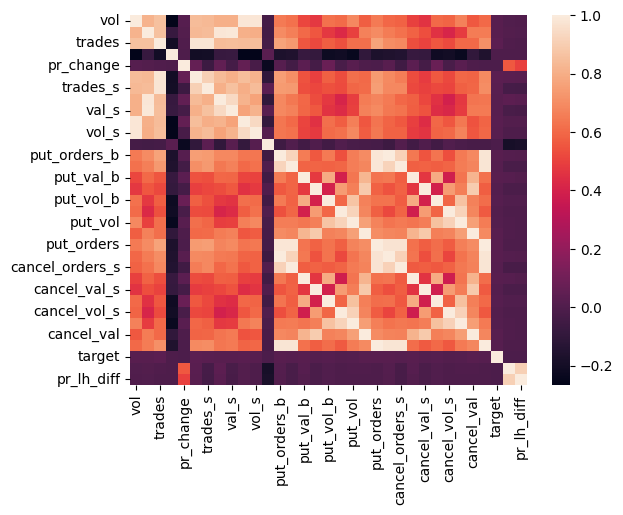

In [1196]:
sns.heatmap(all_corr_df)

In [1197]:
tickers = dict(ts_df['secid'].value_counts())
tickers_list = ['SBER', 'ROSN', 'NVTK', 'GMKN', 'YNDX', 'LKOH', 'PLZL', 'MOEX', 'PHOR', 'GAZP']

In [1198]:
sber

,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,...,cancel_val_b,cancel_val_s,cancel_vol_b,cancel_vol_s,cancel_vol,cancel_val,cancel_orders,target,pr_diff,pr_lh_diff
0,1.005693e+06,2.159411e+09,11667.000000,214.210000,0.400410,6841.000000,4826.000000,1.196334e+09,9.630766e+08,557181.000000,...,4.482127e+10,3.659708e+10,2.087195e+07,1.695984e+07,3.783179e+07,8.141835e+10,150547.000000,0,0.860000,2.170000
1,7.267870e+05,1.560907e+09,7932.000000,215.530000,-0.371644,3397.000000,4535.000000,5.301869e+08,1.030720e+09,246718.000000,...,1.820720e+10,4.271597e+10,8.436132e+06,1.987680e+07,2.831293e+07,6.092317e+10,128850.000000,0,-0.800000,-1.600000
2,2.891070e+05,6.212966e+08,3336.000000,214.280000,0.428944,1822.000000,1514.000000,3.038214e+08,3.174752e+08,141273.000000,...,1.001007e+10,8.804146e+09,4.599868e+06,4.096147e+06,8.696015e+06,1.881421e+10,62955.000000,0,0.920000,1.430000
3,4.619140e+05,9.965707e+08,4152.000000,215.520000,0.157824,2382.000000,1770.000000,5.705734e+08,4.259973e+08,264394.000000,...,9.653638e+09,8.699565e+09,4.430251e+06,4.030232e+06,8.460483e+06,1.835320e+10,63494.000000,0,0.340000,0.690000
4,4.336970e+05,9.339526e+08,4558.000000,215.900000,-0.449032,2150.000000,2408.000000,4.836287e+08,4.503239e+08,224542.000000,...,7.855382e+09,1.074153e+10,3.610322e+06,4.962490e+06,8.572812e+06,1.859691e+10,67275.000000,0,-0.970000,-1.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14105,4.406699e+05,1.143545e+09,6567.908270,256.156506,0.445037,3998.549453,2569.358817,7.463965e+08,3.971484e+08,287657.915379,...,3.830089e+10,2.739988e+10,1.470697e+07,1.040320e+07,2.511017e+07,6.570077e+10,120248.937873,1,1.148493,1.512047
14106,5.839616e+05,7.402952e+08,14068.625484,127.875482,0.217861,7327.523710,6741.101774,3.774007e+08,3.628945e+08,297179.643434,...,1.369926e+10,9.009409e+09,1.029305e+07,7.018247e+06,1.731130e+07,2.270867e+10,57267.038777,1,0.263165,1.165568
14107,2.456306e+05,3.080693e+08,4567.490295,125.462579,0.278544,2529.688556,2037.801739,1.745809e+08,1.334884e+08,139110.151415,...,3.495897e+09,2.623413e+09,2.786594e+06,2.076907e+06,4.863501e+06,6.119310e+09,17914.791999,1,0.350881,0.936761
14108,6.082199e+05,1.714043e+09,10414.045120,285.205282,-0.255270,5067.581551,5346.463569,8.234744e+08,8.905687e+08,294966.694095,...,7.428496e+10,4.450945e+10,2.267850e+07,1.130456e+07,3.398307e+07,1.187944e+11,144210.672714,1,-0.841951,-2.173784


In [1199]:
tickers_list

['SBER',
 'ROSN',
 'NVTK',
 'GMKN',
 'YNDX',
 'LKOH',
 'PLZL',
 'MOEX',
 'PHOR',
 'GAZP']

In [1200]:
# for i, ticker in enumerate(data_list):
#     ticker.to_csv(f'.\Data\{tickers_list[i]}.csv')

In [1201]:
sber.columns

Index(['vol', 'val', 'trades', 'pr_vwap', 'pr_change', 'trades_b', 'trades_s',
       'val_b', 'val_s', 'vol_b', 'vol_s', 'disb', 'put_orders_b',
       'put_orders_s', 'put_val_b', 'put_val_s', 'put_vol_b', 'put_vol_s',
       'put_vol', 'put_val', 'put_orders', 'cancel_orders_b',
       'cancel_orders_s', 'cancel_val_b', 'cancel_val_s', 'cancel_vol_b',
       'cancel_vol_s', 'cancel_vol', 'cancel_val', 'cancel_orders', 'target',
       'pr_diff', 'pr_lh_diff'],
      dtype='object')

In [1202]:
show_percents()

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


## **Пайплайн обучения KNN, LogisticRegression, RandomForest, Catboost**

In [1365]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [1366]:
knn_param_grid = {'classifier__n_neighbors': [2, 3, 5, 7, 8, 10, 20]}
logreg_param_grid = {
    'classifier__C': [0.1, 0.5, 1, 5, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced', {0: 0.02, 1: 0.98}, {0: 0.1, 1: 0.9}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}] 
}
rf_param_grid = {'classifier__n_estimators': [10, 20, 30, 40, 50, 100, 200], 'classifier__max_depth': [None, 10, 11, 15, 20, 30, 50]}
nb_param_grid = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
catboost_param_grid = {}
param_grids = {
    'KNN': knn_param_grid,
    'Logistic Regression': logreg_param_grid,
    'Random Forest': rf_param_grid,
    'CatBoost': catboost_param_grid,  
    'Naive Bayes': nb_param_grid  
}

In [ ]:
def prepare_data(path): #'Test_data/ROSN_test.csv'
    data = pd.read_csv(path)
    # Рассчитываем разницу между ценой открытия и ценой закрытия
    data['pr_diff'] = data['pr_close'] - data['pr_open']

    # Удаляем колонки 'pr_open' и 'pr_close'
    data.drop(['pr_open', 'pr_close'], axis=1, inplace=True)

    # Рассчитываем разницу между 'pr_high' и 'pr_low' со знаком значения 'pr_diff'
    data['pr_lh_diff'] = data['pr_high'] - data['pr_low']
    data['pr_lh_diff'] *= data['pr_diff'].apply(lambda x: 1 if x >= 0 else -1)

    # Удаляем колонки 'pr_high' и 'pr_low'
    data.drop(['pr_high', 'pr_low'], axis=1, inplace=True)

    data = data.drop(columns=['tradedate', 'tradetime', 'secid', 'pr_vwap_s', 'put_vwap_b', 'put_vwap_s', 'cancel_vwap_s', 'cancel_vwap_b', 'pr_std', 'pr_vwap_b'])

    return data

In [1406]:
def get_dataframe_name(dataframe):
    for name, obj in globals().items():
        if obj is dataframe:
            return name
    return None

In [1410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import joblib

def get_model(ticker):

    tick_name = get_dataframe_name(ticker)

    X_train, X_test, y_train, y_test = train_test_split(ticker.drop(columns='target'), ticker['target'], test_size=0.2, random_state=42)
    num_features = ticker.select_dtypes(include=['float64']).columns

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features), 
        ],
    )
    class_weights = {0: 0.02, 1: 1}
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])

    logreg_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight=class_weights))
    ])

    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ])

    nb_pipeline = Pipeline([
        # ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ]
    )

    catboost_pipeline = Pipeline([
        ('classifier', CatBoostClassifier())
    ])
    models = {
        'KNN': knn_pipeline,
        'Logistic Regression': logreg_pipeline,
        'Random Forest': rf_pipeline,
        'NaiveBayes': nb_pipeline,
        'CatBoost': catboost_pipeline,
    }
    best_models = {}

    for name, model in models.items():
        param_grid = param_grids.get(name, {}) 
        grid_search = GridSearchCV(model, param_grid, cv=2, scoring='roc_auc')  
        grid_search.fit(X_train[num_features], y_train)
        
        best_params = grid_search.best_params_ 
        y_pred_proba = grid_search.predict_proba(X_test[num_features])[:, 1]  
        
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, grid_search.predict(X_test[num_features]))
        accuracy = accuracy_score(y_test, grid_search.predict(X_test[num_features]))
        precision = precision_score(y_test, grid_search.predict(X_test[num_features]))
        recall = recall_score(y_test, grid_search.predict(X_test[num_features]))
        
        print(f"{name} Best Parameters: {best_params}")
        print(f"{name} ROC-AUC: {roc_auc}")
        print(f"{name} F1 Score: {f1}")
        print(f"{name} Accuracy: {accuracy}")
        print(f"{name} Precision: {precision}")
        print(f"{name} Recall: {recall}")
    
        best_models[name] = grid_search.best_estimator_ 


    
    rf = best_models['Random Forest']
    rf_hyperparameters = rf.named_steps['classifier'].get_params()
    ticker_test_data = prepare_data(path=f'Test_data/{tick_name.upper()}_test.csv')

    X_for_pred = ticker_test_data.drop(columns='target')
    y_pred = ticker_test_data['target']

    params = rf_hyperparameters

    # Создание модели случайного леса с указанными параметрами
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train, y_train)
    # Кросс-валидация с использованием стратифицированной k-блочной схемы
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Оценка качества модели с использованием кросс-валидации
    cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='precision')

    # Вывод результатов
    print("Cross-Validation Scores:", cross_val_scores)
    print("Mean Precision:", cross_val_scores.mean()) 


    preds_a = rf_model.predict(X_test)
    precision_a = precision_score(y_test, preds_a)

    print(precision_a)

    preds_b = rf_model.predict(X_for_pred)
    precision_b = precision_score(y_pred, preds_b)

    print(precision_b)


    joblib.dump(rf_model, f'Models/{tick_name}_random_forest_model_not_pipeline.joblib')
    rf_model = joblib.load(f'Models/{tick_name}_random_forest_model_not_pipeline.joblib')
    preds_1 = rf_model.predict(X_for_pred)

    precision = precision_score(y_pred, preds_1)
    print(precision)

In [1411]:
for i in [gmkn, yndx, lkoh, plzl, moex, phor, gazp]:
    print(get_dataframe_name(i))

    get_model(i)

gmkn
KNN Best Parameters: {'classifier__n_neighbors': 5}
KNN ROC-AUC: 0.9550814206885521
KNN F1 Score: 0.88511174063582
KNN Accuracy: 0.8709791445740545
KNN Precision: 0.8020536223616657
KNN Recall: 0.9873595505617978


c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.1, 1: 0.9}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6970920468631293
Logistic Regression F1 Score: 0.6702753589079783
Logistic Regression Accuracy: 0.5047720042417816
Logistic Regression Precision: 0.5040707964601769
Logistic Regression Recall: 1.0
Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9965847294973811
Random Forest F1 Score: 0.9683631361760661
Random Forest Accuracy: 0.967479674796748
Random Forest Precision: 0.9487870619946092
Random Forest Recall: 0.9887640449438202
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.5758991762965333
NaiveBayes F1 Score: 0.31825273010920435
NaiveBayes Accuracy: 0.5365853658536586
NaiveBayes Precision: 0.6132264529058116
NaiveBayes Recall: 0.2148876404494382
Learning rate set to 0.021592
0:	learn: 0.6885424	total: 6.31ms	remaining: 6.31s
1:	learn: 0.6825242	t

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6693863309263
Logistic Regression F1 Score: 0.6629404617253949
Logistic Regression Accuracy: 0.5007199424046076
Logistic Regression Precision: 0.4961804292469989
Logistic Regression Recall: 0.9985358711566618
Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9887216973110632
Random Forest F1 Score: 0.9451022604951561
Random Forest Accuracy: 0.9449244060475162
Random Forest Precision: 0.9268121041520057
Random Forest Recall: 0.9641288433382138
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.6019622644639754
NaiveBayes F1 Score: 0.6661687826736371
NaiveBayes Accuracy: 0.5172786177105831
NaiveBayes Precision: 0.5047152018106374
NaiveBayes Recall: 0.9795021961932651
Learning rate set to 0.021425
0:	learn: 0.6906289	total: 5.83ms	remaining: 5.82s
1:	learn:

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6516563281901584
Logistic Regression F1 Score: 0.5949820788530465
Logistic Regression Accuracy: 0.6
Logistic Regression Precision: 0.6005788712011577
Logistic Regression Recall: 0.5894886363636364
Random Forest Best Parameters: {'classifier__max_depth': 50, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9953451794764867
Random Forest F1 Score: 0.9643356643356643
Random Forest Accuracy: 0.9638938053097346
Random Forest Precision: 0.949724517906336
Random Forest Recall: 0.9794034090909091
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.539258476615128
NaiveBayes F1 Score: 0.6620125180548868
NaiveBayes Accuracy: 0.5030088495575221
NaiveBayes Precision: 0.5007283321194465
NaiveBayes Recall: 0.9765625
Learning rate set to 0.021577
0:	learn: 0.6898295	total: 6.4ms	remaining: 6.39s
1:	learn: 0.6868551	total: 19.6ms	remaining: 

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.1, 1: 0.9}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6428741513212524
Logistic Regression F1 Score: 0.6637972262075562
Logistic Regression Accuracy: 0.4985734664764622
Logistic Regression Precision: 0.49677881173944166
Logistic Regression Recall: 1.0
Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9921278431755646
Random Forest F1 Score: 0.9547703180212015
Random Forest Accuracy: 0.9543509272467903
Random Forest Precision: 0.9368932038834952
Random Forest Recall: 0.973342939481268
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.5686389289145053
NaiveBayes F1 Score: 0.1312938177182919
NaiveBayes Accuracy: 0.5139087018544936
NaiveBayes Precision: 0.569060773480663
NaiveBayes Recall: 0.07420749279538905
Learning rate set to 0.02151
0:	learn: 0.6903512	total: 11.9ms	remaining: 11.9s
1:	learn: 0.6874826	to

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.670857512732111
Logistic Regression F1 Score: 0.6685592618878637
Logistic Regression Accuracy: 0.504946996466431
Logistic Regression Precision: 0.502132196162047
Logistic Regression Recall: 1.0
Random Forest Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9943767446250937
Random Forest F1 Score: 0.9628330995792426
Random Forest Accuracy: 0.9625441696113074
Random Forest Precision: 0.9541348158443363
Random Forest Recall: 0.9716914366595896
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.6181175804269359
NaiveBayes F1 Score: 0.6412030075187971
NaiveBayes Accuracy: 0.5784452296819788
NaiveBayes Precision: 0.5575313807531381
NaiveBayes Recall: 0.7544232130219392
Learning rate set to 0.021597
0:	learn: 0.6880165	total: 6.74ms	remaining: 6.73s
1:	learn: 0.6827033	to

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': {0: 0.02, 1: 0.98}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.7219775895527636
Logistic Regression F1 Score: 0.6685512367491167
Logistic Regression Accuracy: 0.503177966101695
Logistic Regression Precision: 0.5021231422505308
Logistic Regression Recall: 1.0
Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9969489493263749
Random Forest F1 Score: 0.9627605056371712
Random Forest Accuracy: 0.9615112994350282
Random Forest Precision: 0.9343501326259946
Random Forest Recall: 0.992952783650458
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.6121218106109234
NaiveBayes F1 Score: 0.6600628171055811
NaiveBayes Accuracy: 0.503177966101695
NaiveBayes Precision: 0.5022058823529412
NaiveBayes Recall: 0.9626497533474278
Learning rate set to 0.021603
0:	learn: 0.6875932	total: 6.43ms	remaining: 6.42s
1:	learn: 0.6822623	t

c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6986160322671755
Logistic Regression F1 Score: 0.6608325449385052
Logistic Regression Accuracy: 0.4940014114326041
Logistic Regression Precision: 0.493465206640763
Logistic Regression Recall: 1.0
Random Forest Best Parameters: {'classifier__max_depth': 50, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9956333509174894
Random Forest F1 Score: 0.9666315419740078
Random Forest Accuracy: 0.9664784756527875
Random Forest Precision: 0.9489655172413793
Random Forest Recall: 0.9849677881173944
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.6236734049352199
NaiveBayes F1 Score: 0.3609653725078698
NaiveBayes Accuracy: 0.5702187720536345
NaiveBayes Precision: 0.6758349705304518
NaiveBayes Recall: 0.2462419470293486
Learning rate set to 0.021606
0:	learn: 0.6890085	total: 7.01ms	remaining: 7.01s
1:	learn: 0.6856440	to

In [1367]:
X_train, X_test, y_train, y_test = train_test_split(gmkn.drop(columns='target'), gmkn['target'], test_size=0.2, random_state=42)

In [1368]:
num_features = rosn.select_dtypes(include=['float64']).columns
target = 'target'

In [1369]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features), 
    ],
)

In [1370]:
class_weights = {0: 0.02, 1: 1}
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight=class_weights))
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

nb_pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
]
)

catboost_pipeline = Pipeline([
    ('classifier', CatBoostClassifier())
])

In [1371]:
models = {
    'KNN': knn_pipeline,
    'Logistic Regression': logreg_pipeline,
    'Random Forest': rf_pipeline,
    'NaiveBayes': nb_pipeline,
    'CatBoost': catboost_pipeline,
}

In [1372]:
best_models = {}

for name, model in models.items():
    param_grid = param_grids.get(name, {}) 
    grid_search = GridSearchCV(model, param_grid, cv=2, scoring='roc_auc')  
    grid_search.fit(X_train[num_features], y_train)
    
    best_params = grid_search.best_params_ 
    y_pred_proba = grid_search.predict_proba(X_test[num_features])[:, 1]  
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, grid_search.predict(X_test[num_features]))
    accuracy = accuracy_score(y_test, grid_search.predict(X_test[num_features]))
    precision = precision_score(y_test, grid_search.predict(X_test[num_features]))
    recall = recall_score(y_test, grid_search.predict(X_test[num_features]))
    
    print(f"{name} Best Parameters: {best_params}")
    print(f"{name} ROC-AUC: {roc_auc}")
    print(f"{name} F1 Score: {f1}")
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")

    best_models[name] = grid_search.best_estimator_ 

KNN Best Parameters: {'classifier__n_neighbors': 5}
KNN ROC-AUC: 0.9541170848267623
KNN F1 Score: 0.8879009209272785
KNN Accuracy: 0.874822695035461
KNN Precision: 0.8109048723897911
KNN Recall: 0.9810526315789474


c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}, 'classifier__penalty': 'l2'}
Logistic Regression ROC-AUC: 0.6713782305225429
Logistic Regression F1 Score: 0.6753616314915817
Logistic Regression Accuracy: 0.5145390070921986
Logistic Regression Precision: 0.5100286532951289
Logistic Regression Recall: 0.9992982456140351
Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Random Forest ROC-AUC: 0.9960160975916494
Random Forest F1 Score: 0.974714236231382
Random Forest Accuracy: 0.974113475177305
Random Forest Precision: 0.9623803009575923
Random Forest Recall: 0.9873684210526316
NaiveBayes Best Parameters: {}
NaiveBayes ROC-AUC: 0.6136281204804125
NaiveBayes F1 Score: 0.6039603960396039
NaiveBayes Accuracy: 0.574468085106383
NaiveBayes Precision: 0.5700934579439252
NaiveBayes Recall: 0.6421052631578947
Learning rate set to 0.021561
0:	learn: 0.6885709	total: 5.96ms	remaining: 5.96s
1:	learn:

In [1373]:
knn = best_models['KNN']
catboost = best_models['CatBoost']
logreg = best_models['Logistic Regression']
rf = best_models['Random Forest']
naiv_b = best_models['NaiveBayes']

In [1374]:
preds = rf.predict(X_test)
cat_pred = catboost.predict(X_test)
knn_preds = knn.predict(X_test)
logreg_preds = logreg.predict(X_test)

In [1375]:
print(precision_score(y_test, preds))
print(precision_score(y_test, cat_pred))
print(precision_score(y_test, knn_preds))
print(precision_score(y_test, logreg_preds))

0.9623803009575923
0.9228232189973615
0.8109048723897911
0.5100286532951289


In [1376]:
count = 0
for i in preds:
    if i == 1:
        count += 1
print(count)

count = 0
for i in cat_pred:
    if i == 1:
        count += 1
print(count)

count = 0
for i in knn_preds:
    if i == 1:
        count += 1
print(count)

1462
1516
1724


In [1380]:
count = 0
for i in preds:
    if i == 0:
        count += 1
print(count)

count = 0
for i in cat_pred:
    if i == 0:
        count += 1
print(count)

count = 0
for i in knn_preds:
    if i == 0:
        count += 1
print(count)

1358
1304
1096


In [1381]:
print(len(preds))
print(len(cat_pred))
print(len(knn_preds))

2820
2820
2820


## **Тестирование**

In [1412]:
phor_test_data = prepare_data(path='Test_data/PHOR_test.csv')
yndx_test_data = prepare_data(path='Test_data/YNDX_test.csv')

In [1414]:
yndx_model = joblib.load('Models/yndx_random_forest_model_not_pipeline.joblib')
phor_model = joblib.load('Models/phor_random_forest_model_not_pipeline.joblib')

In [1413]:
X_for_pred = yndx_test_data.drop(columns='target')
y_pred = yndx_test_data['target']

In [1324]:
# rf_tr_data = rf.transform(X_for_pred)
# rf_preds = rf.predict(rf_tr_data)
# #
# precision_rf = precision_score(y_pred, rf_preds)

# print(precision_rf)

In [1417]:
preds_b = yndx_model.predict(X_for_pred)
precision_b = precision_score(y_pred, preds_b)

print(precision_b)

0.71875


In [1385]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

# Ваши параметры модели
params = {'max_depth': 30, 'n_estimators': 200}

# Создание модели случайного леса с указанными параметрами
rf_model = RandomForestClassifier(**params)
rf_model.fit(X_train, y_train)
# Кросс-валидация с использованием стратифицированной k-блочной схемы
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Оценка качества модели с использованием кросс-валидации
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='precision')

# Вывод результатов
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Precision:", cross_val_scores.mean()) 

Cross-Validation Scores: [0.95800525 0.95159896 0.94691781 0.95172414 0.94548552]
Mean Precision: 0.9507463355840209


In [1327]:
# # Создание модели случайного леса с указанными параметрами
# catb = CatBoostClassifier()
# catb.fit(X_train, y_train)
# # Кросс-валидация с использованием стратифицированной k-блочной схемы
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Оценка качества модели с использованием кросс-валидации
# cross_val_scores = cross_val_score(catb, X_train, y_train, cv=cv, scoring='precision')

# # Вывод результатов
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean Precision:", cross_val_scores.mean()) 

In [ ]:
# # Создание модели случайного леса с указанными параметрами
# catb = CatBoostClassifier()
# catb.fit(X_train, y_train)
# # Кросс-валидация с использованием стратифицированной k-блочной схемы
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Оценка качества модели с использованием кросс-валидации
# cross_val_scores = cross_val_score(catb, X_train, y_train, cv=cv, scoring='precision')

# # Вывод результатов
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean Precision:", cross_val_scores.mean()) 

In [1317]:
# params = {'classifier__C': 0.1, 'classifier__class_weight': {0: 0.02, 1: 0.98}, 'classifier__penalty': 'l2'}
# scaler = RobustScaler()
# X = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# kn_mod = KNeighborsClassifier(n_neighbors=5)
# kn_mod.fit(X, y_train)
# # Кросс-валидация с использованием стратифицированной k-блочной схемы
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Оценка качества модели с использованием кросс-валидации
# cross_val_scores = cross_val_score(kn_mod, X_train, y_train, cv=cv, scoring='precision')

# # Вывод результатов
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean Precision:", cross_val_scores.mean())


Cross-Validation Scores: [0.74101247 0.75018811 0.73633678 0.74104478 0.74261923]
Mean Precision: 0.7422402735475094


In [1318]:

# preds_lr = kn_mod.predict(X_test)
# precision_lr = precision_score(y_test, preds_lr)

# print(precision_lr)
# X_t = scaler.transform(X_for_pred)
# preds_lr_test = kn_mod.predict(X_t)
# precision_lr_test = precision_score(y_pred, preds_lr_test)

# print(precision_lr_test)

0.5053840631730079
0.18696883852691218


c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1303]:
# preds_cb = catb.predict(X_test)
# precision_cb = precision_score(y_test, preds_cb)

# print(precision_cb)

# preds_cb_test = catb.predict(X_for_pred)
# precision_cb_test = precision_score(y_pred, preds_cb_test)

# print(precision_cb_test)

0.8868778280542986
0.39864864864864863


In [1386]:
preds_a = rf_model.predict(X_test)
precision_a = precision_score(y_test, preds_a)

print(precision_a)

preds_b = rf_model.predict(X_for_pred)
precision_b = precision_score(y_pred, preds_b)

print(precision_b)

0.9636737491432488
0.819672131147541


In [1387]:
count = 0
for i in preds_b:
    if i == 1:
        count += 1
print(count)

print(count*precision_b)

61
50.0


In [1388]:
len(preds_b)

1233

In [1389]:
count = 0
for i in preds_b:
    if i == 0:
        count += 1
print(count)

1172


In [1390]:
X_for_pred

,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,...,cancel_orders_s,cancel_val_b,cancel_val_s,cancel_vol_b,cancel_vol_s,cancel_vol,cancel_val,cancel_orders,pr_diff,pr_lh_diff
0,55063.0,250396947.0,2551.0,453.96,0.352617,1599.0,952.0,143785673.0,106611270.0,31608.0,...,8355.0,3.424439e+09,3.697161e+09,715422.0,811772.0,1527194.0,7.121600e+09,15870.0,1.60,2.60
1,98869.0,450830370.0,3429.0,455.36,0.615858,2399.0,1030.0,342577677.0,108252687.0,75129.0,...,18364.0,9.573577e+09,1.046278e+10,2101524.0,2291476.0,4393000.0,2.003636e+10,35352.0,2.80,2.80
2,53700.0,245661452.0,1481.0,457.11,0.186077,793.0,688.0,112007159.0,133654292.0,24475.0,...,7228.0,3.226119e+09,4.006843e+09,697951.0,874620.0,1572571.0,7.232962e+09,13198.0,0.85,1.70
3,32615.0,149317350.0,1059.0,457.63,0.153039,605.0,454.0,87128840.0,62188507.0,19029.0,...,5645.0,2.281811e+09,5.126853e+09,499055.0,1118088.0,1617143.0,7.408664e+09,9743.0,0.70,1.25
4,29094.0,133242461.0,1110.0,457.97,0.043687,561.0,549.0,56357638.0,76884820.0,12303.0,...,5823.0,3.053596e+09,3.463983e+09,663723.0,754990.0,1418713.0,6.517579e+09,11086.0,0.20,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,467995.0,261487813.0,5582.0,556.95,0.089518,3236.0,2346.0,128133644.0,133354162.0,229337.0,...,20325.0,7.761550e+09,7.704273e+09,13881356.0,13730246.0,27611602.0,1.546582e+10,39954.0,0.50,4.90
1229,209770.0,117204553.0,4384.0,559.85,-0.044711,3069.0,1315.0,53984235.0,63220311.0,96615.0,...,11835.0,3.853117e+09,4.465567e+09,6870206.0,7969955.0,14840161.0,8.318684e+09,22568.0,-0.25,-2.65
1230,124276.0,69474757.0,3914.0,558.32,0.277678,3041.0,873.0,45655796.0,23818955.0,81659.0,...,6491.0,2.539652e+09,3.289544e+09,4553102.0,5871518.0,10424620.0,5.829196e+09,15656.0,1.55,2.05
1231,141424.0,79078681.0,7942.0,559.55,-0.241136,6714.0,1228.0,42493472.0,36585203.0,75963.0,...,11191.0,2.151902e+09,4.844376e+09,3858104.0,8634632.0,12492736.0,6.996278e+09,18643.0,-1.35,-2.25


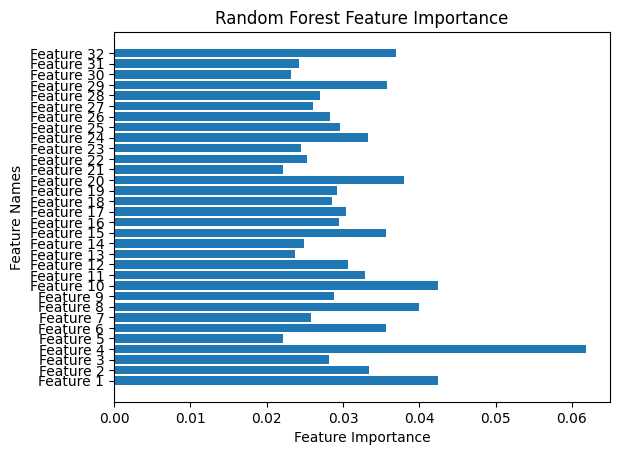

In [1391]:
# # Предположим, что ваша модель случайного леса находится внутри объекта Pipeline
# rf_pipeline = best_models['Random Forest']  # Замените на ваш объект Pipeline

# # Получение модели из Pipeline
# rf_model = rf_pipeline.named_steps['classifier']  # Замените 'randomforestclassifier' на имя вашего шага с моделью

# Получение значений важности признаков
feature_importance = rf_model.feature_importances_

# Сопоставление значений важности признаков с их именами (замените на реальные имена)
feature_names = [f"Feature {i}" for i in range(1, len(feature_importance) + 1)]

# Визуализация значений важности признаков
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()

## **Сохранение модели**

In [1392]:
import joblib

# joblib.dump(rf_model, 'Models/nvtk_random_forest_model.joblib')
# loaded_rf = joblib.load('Models/nvtk_random_forest_model.joblib')

In [1393]:
joblib.dump(rf_model, 'Models/rosn_random_forest_model_not_pipeline.joblib')

['Models/rosn_random_forest_model_not_pipeline.joblib']

In [1395]:
joblib.dump(rf_model, 'Models/rosn_random_forest_model_not_pipeline.joblib')
rf_model = joblib.load('Models/rosn_random_forest_model_not_pipeline.joblib')
preds_1 = rf_model.predict(X_for_pred)

precision = precision_score(y_pred, preds_1)
precision

0.819672131147541

## **Визуализации**

In [ ]:
# numeric_features = sber.columns
# for feature in numeric_features:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(sber[feature], kde=True, color='blue')
#     plt.title(f'Distribution of {feature}')
#     plt.show()

## **Эксперименты**

In [ ]:
# class KNN:
#     """
#     Параметры:
#     1) k: int - количество соседей.
#     2) metric: str, опционально - способ оценки расстояния между объектами. Поддерживаемые значения: 
#        'euclidean' (по умолчанию), 'manhattan', 'minkowski', 'chebyshev', 'cosinus'.
#     3) weight_func: callable, опционально - функция, принимающая на вход расстояния от объекта x из тестовой выборки 
#        до всех объектов из train выборки и возвращающая веса каждого объекта. 
#        Может также принимать ядерную функцию и окно h.
#        Если используется метод Парзеновского окна с постояннgетр h типа float.
#        Если h - функция, нужно передать callable.
#        Пример:  def weight_func(dists, h, kernel):
#                    return kernel(dists/h)
#             model = KNN(weight_func=weight_func, h = 0.5, kernel='epanechnikov')
#     4) h: float или callable, опционально - окно для метода Парзеновского окна. Игнорируется, если weight_func не использует h.
#        Если h - функция, передать callable.
#     5) kernel: str, callable, опционально - ядерная функция для метода Парзеновского окна. Поддерживаемые значения:
#        'rectangular', 'triangular', 'epanechnikov', 'quartic', 'gaussian'.
#        Если ядерная функция предоставляется через weight_func, этот параметр игнорируется.
#     """
#     def __init__(self, k = 3, metric = 'euclidean', weight_func = None, h = None, kernel = 'None'):
#         self.k = k
#         self.metric = metric
#         self.weight_func = weight_func
#         self.distance = {
#             'euclidean': lambda x,y: np.sqrt(np.sum(np.square(x-y))),
#             'manhattan': lambda x, y: np.sum(np.abs(x-y)),
#             'minkowski': lambda x, y: np.power(np.sum(np.abs(x - y) ** (len(x))), 1/(len(x))),
#             'chebyshev': lambda x, y: np.max(np.abs(x-y)),
#             'cosinus': lambda x, y: 1 - (x*y)/(np.linalg.norm(x)*np.linalg.norm(y))
#         }[metric]
#         self.h = h
#         self.kernel = {
#             'rectangular': lambda r: 0.5*((np.abs(r) <= 1).astype(float)),
#             'triangular': lambda r: (1 - np.abs(r))*(np.abs(r) <= 1).astype(float),
#             'epanechnikov': lambda r: 0.75 * (1 - r**2) * ((np.abs(r) <= 1).astype(float)),
#             'quartic': lambda r: ((15/16)*(1-r**2)**2)*(np.abs(r) <= 1).astype(float),
#             'gaussian': lambda r: (1/np.sqrt(2 * np.pi)) * np.exp(-2 * r**2),
#             'None': None
#         }[kernel]

#     def fit(self, X, y):
#         self.X = X
#         self.y = y
    
#     def predict(self, X):
#         predictions = []
#         for x in X:

#             dists = np.array([self.distance(x,y) for y in self.X])

#             if self.weight_func:
#                 if self.h and self.kernel:
#                     weights = self.weight_func(dists, self.h, self.kernel)
#                     neighbors = np.argsort(dists)[:]
#                 else:
#                     neighbors = np.argsort(dists)[:self.k+1]
#                     k_dists = dists[neighbors]
#                     weights = self.weight_func(k_dists)
                    
#                 predictions.append(np.argmax(np.bincount(self.y[neighbors], weights=weights[neighbors])))
                    
#             else:
#                 neighbors = self.y[dists.argsort()[:self.k]]
#                 predictions.append(np.argmax(np.bincount(neighbors)))

#         return np.array(predictions)
                
            

In [ ]:
# def parzen_window(dists, h, kernel):
#     return kernel(dists/h)

In [ ]:
# kernel_functions = ['rectangular', 'triangular', 'epanechnikov', 'quartic', 'gaussian']

# # Определение метрик расстояния
# distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'cosinus']

# # Перебор всех возможных комбинаций ядер и метрик расстояния
# best_accuracy = 0
# best_params = None

# for metric in distance_metrics:
#     for kernel in kernel_functions:
#         knn_model = KNN(k=3, metric=metric, weight_func=parzen_window, h=5, kernel=kernel)
#         knn_model.fit(np.array(X_train[num_features]), np.array(y_train))
#         y_pred = knn_model.predict(np.array(X_test[num_features]))
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)

#         print(f"Kernel: {kernel}, Metric: {metric}, precision: {precision}")

#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = {'kernel': kernel, 'metric': metric}

# print("\nBest Parameters:")
# print(best_params)